In [235]:
print("hello world!")

hello world!


In [236]:
import os
import tarfile
from six.moves import urllib

# GET DATA

In [237]:
import opendatasets as od 
import zipfile

DOWNLOAD_ROOT = "https://www.kaggle.com/lgmoneda/cartola-fc-brasil-scouts"
SCOUTS_PATH = os.path.join("datasets", "scouts")
SCOUTS_URL = DOWNLOAD_ROOT


def fetch_scouts_data(scouts_url=SCOUTS_URL, scouts_path=SCOUTS_PATH):
    if not os.path.isdir(scouts_path):
        os.makedirs(scouts_path)
    
    zip_path = os.path.join(scouts_path, "archive.zip")
    print(scouts_url)
    od.download(DOWNLOAD_ROOT, scouts_path)

#     scouts_zip = tarfile.open(zip_path)
#     scouts_zip.extractall(path=scouts_path)
#     scouts_zip.close()
    
fetch_scouts_data()

import pandas as pd

def load_scouts_data(scout_path=SCOUTS_PATH):
    csv_path = os.path.join(scout_path + "/cartola-fc-brasil-scouts", "jogadores.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

https://www.kaggle.com/lgmoneda/cartola-fc-brasil-scouts
Skipping, found downloaded files in "datasets/scouts/cartola-fc-brasil-scouts" (use force=True to force download)


In [238]:
scouts = load_scouts_data()


datasets/scouts/cartola-fc-brasil-scouts/jogadores.csv


In [239]:
games_path = os.path.join(SCOUTS_PATH + "/cartola-fc-brasil-scouts", "jogos.csv")
games = pd.read_csv(games_path)
games.head()

,mandante,visitante,placar_mandante,placar_visitante,data,local,rodada,ano
0,Fortaleza,Athlético-PR,0.0,2.0,"SÁB, 08/08 19:00",Castelão (CE),1,2020
1,Coritiba,Internacional,0.0,1.0,"SÁB, 08/08 19:30",Couto Pereira,1,2020
2,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro,1,2020
3,Botafogo,Bahia,NaN,NaN,"DOM, 09/08 11:00",JOGO ADIADO* (Partida não válida para a rodada),1,2020
4,Flamengo,Atlético-MG,0.0,1.0,"DOM, 09/08 16:00",Maracanã,1,2020


In [240]:
scouts_with_local = pd.merge(scouts,games,how='inner',left_on=['Clube', 'rodada', 'ano'],right_on=['mandante','rodada', 'ano'])
scouts_with_away =  pd.merge(scouts,games,how='inner',left_on=['Clube', 'rodada', 'ano'],right_on=['visitante','rodada', 'ano'])
scouts = pd.concat([scouts_with_local, scouts_with_away], ignore_index=True, sort=False)

# Looking at the data 

In [241]:
scouts.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,rodada,ano,RB,PE,mandante,visitante,placar_mandante,placar_visitante,data,local
0,Elton (ATA),Sport,14.21,1.0,15.60,15.60,10.21,NaN,2.0,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
1,Jonatan Gomez (MEI),Sport,11.96,1.0,9.50,9.50,4.96,NaN,1.0,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
2,Patric (LAT),Sport,7.46,1.0,5.30,5.30,2.46,1.0,NaN,1.0,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
3,Daniel Paulista (TEC),Sport,4.65,1.0,4.42,4.42,2.65,NaN,NaN,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro
4,Sander (LAT),Sport,8.19,1.0,4.30,4.30,1.19,4.0,NaN,NaN,...,1,2020,NaN,NaN,Sport,Ceará,3.0,2.0,"SÁB, 08/08 21:00",Ilha do Retiro


In [242]:
scouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome              16404 non-null  object 
 1   Clube             16404 non-null  object 
 2   Preço             16404 non-null  float64
 3   J                 16404 non-null  float64
 4   Média             16404 non-null  float64
 5   Últ. Pont.        16404 non-null  float64
 6   Variação          16404 non-null  float64
 7   DS                6471 non-null   float64
 8   G                 6581 non-null   float64
 9   A                 5905 non-null   float64
 10  SG                5805 non-null   float64
 11  FS                13844 non-null  float64
 12  FF                11416 non-null  float64
 13  FD                10229 non-null  float64
 14  FT                2930 non-null   float64
 15  DD                1322 non-null   float64
 16  DP                412 non-null    float6

In [243]:
#criando attr posicao
scouts["Posicao"] = scouts["Nome"].apply(lambda x : pd.Series(x.split('(')))[1].str.replace(")","", regex=True)


In [244]:
scouts["Posicao"].value_counts()

MEI    5017
ATA    3143
ZAG    2795
LAT    2625
TEC    1438
GOL    1386
Name: Posicao, dtype: int64

In [245]:
def isLocal(row):
    if row['Clube'] == row['mandante']:
        val = 1
    else:
        val = 0
    return val

def isAway(row):
    if row['Clube'] == row['visitante']:
        val = 1
    else:
        val = 0
    return val

scouts['e_mandante'] = scouts.apply(isLocal, axis=1)
scouts['e_visitante'] = scouts.apply(isAway, axis=1)

In [246]:
scouts.describe()

,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,...,I,PI,rodada,ano,RB,PE,placar_mandante,placar_visitante,e_mandante,e_visitante
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,6471.000000,6581.000000,5905.000000,5805.000000,13844.000000,...,6010.000000,7065.000000,16404.000000,16404.000000,6830.000000,7530.000000,15876.000000,15876.000000,16404.000000,16404.000000
mean,7.325429,12.265301,3.073508,2.910665,0.064092,19.033071,2.587145,1.832854,4.222567,13.862251,...,3.028453,68.503185,19.512436,2019.480493,15.193997,22.650066,1.401109,1.003212,0.501280,0.498720
std,3.829021,8.327157,1.989410,4.019386,1.070262,16.761335,2.591994,1.275022,2.905781,14.040226,...,3.124587,62.432027,11.070877,0.499635,13.767498,19.194452,1.159901,0.998293,0.500014,0.500014
min,0.690000,0.000000,-7.200000,-10.700000,-7.380000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.480000,5.000000,1.880000,0.000000,-0.440000,6.000000,1.000000,1.000000,2.000000,4.000000,...,1.000000,23.000000,10.000000,2019.000000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,6.710000,11.000000,2.940000,1.900000,0.000000,14.000000,2.000000,1.000000,4.000000,9.000000,...,2.000000,50.000000,19.000000,2019.000000,11.000000,17.000000,1.000000,1.000000,1.000000,0.000000
75%,9.610000,18.000000,4.080000,4.900000,0.500000,27.000000,3.000000,2.000000,6.000000,19.000000,...,4.000000,94.000000,29.000000,2020.000000,21.000000,33.000000,2.000000,2.000000,1.000000,1.000000
max,26.220000,38.000000,22.700000,37.700000,14.520000,121.000000,25.000000,13.000000,15.000000,147.000000,...,24.000000,394.000000,38.000000,2020.000000,94.000000,123.000000,6.000000,5.000000,1.000000,1.000000


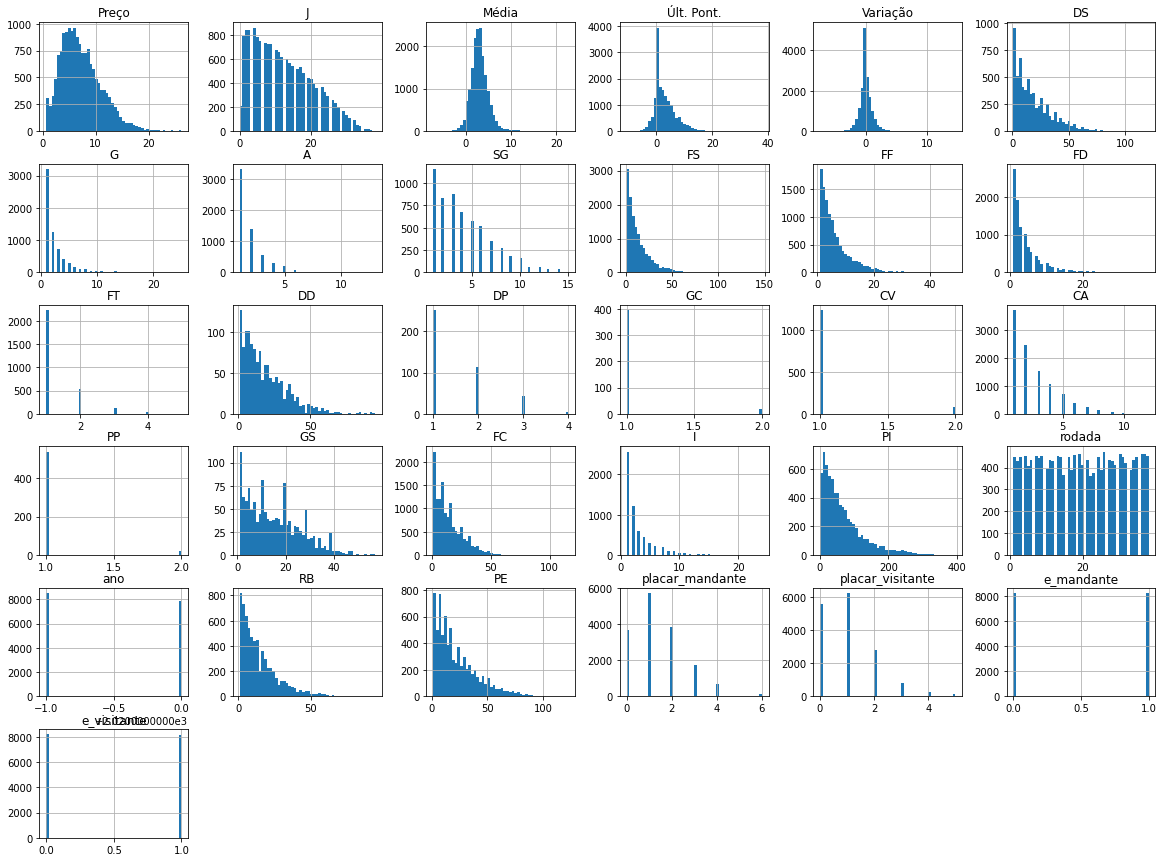

In [247]:
%matplotlib inline
import matplotlib.pyplot as plt
scouts.hist(bins=50, figsize=(20, 15))
plt.show()

In [248]:
import numpy as np 
np.sum((scouts["ano"] == 2020) & (scouts["rodada"] > 22))

#afim de dividir os conjuntos de teste e treino em 20% e 80% respec.
#observa-se que o número de linhas que satisfaz a condição é a partir da rodada 22
#OBS= total 16404 - 20% 3280

3313

In [249]:
#split in train and test data

train_set = scouts[(scouts["ano"] == 2019) | ((scouts["ano"] == 2020) & (scouts["rodada"] < 23))]
test_set = scouts[(scouts["ano"] == 2020) & (scouts["rodada"] > 22)]

# Discover and visualize data to gain insights

In [250]:
scouts = train_set.copy()

<AxesSubplot:xlabel='Preço', ylabel='Últ. Pont.'>

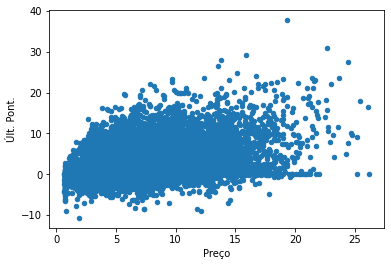

In [251]:
scouts.plot(kind="scatter", x="Preço", y="Últ. Pont.")

<AxesSubplot:xlabel='Preço', ylabel='Últ. Pont.'>

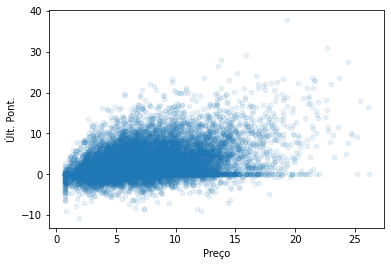

In [252]:
scouts.plot(kind="scatter", x="Preço", y="Últ. Pont.", alpha=0.1)

<AxesSubplot:xlabel='Preço', ylabel='Últ. Pont.'>

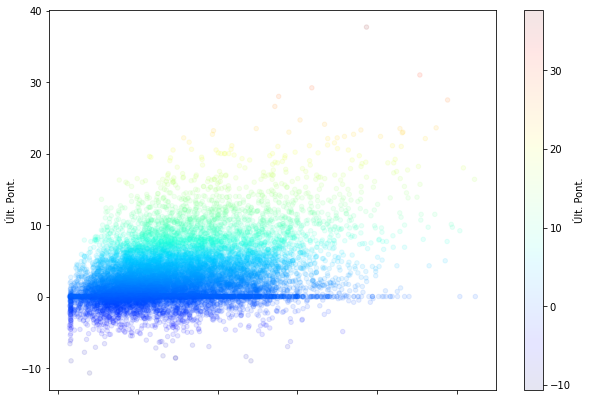

In [253]:
scouts.plot(kind="scatter", x="Preço", y="Últ. Pont.",alpha=0.1,figsize=(10,7), c="Últ. Pont.", cmap=plt.get_cmap("jet"), colorbar=True )

<AxesSubplot:xlabel='Média', ylabel='Últ. Pont.'>

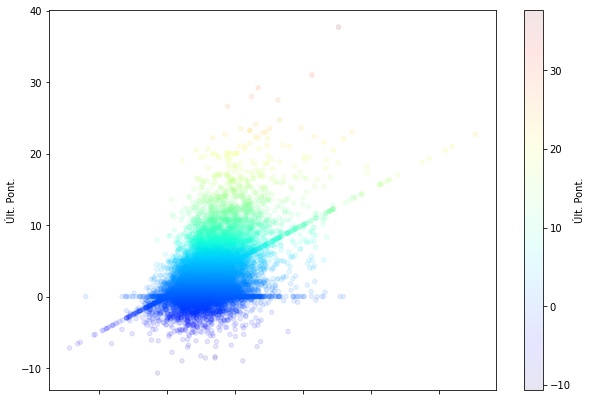

In [254]:
scouts.plot(kind="scatter", x="Média", y="Últ. Pont.", alpha=0.1,figsize=(10,7), c="Últ. Pont.", cmap=plt.get_cmap("jet"), colorbar=True)

<AxesSubplot:xlabel='Variação', ylabel='Últ. Pont.'>

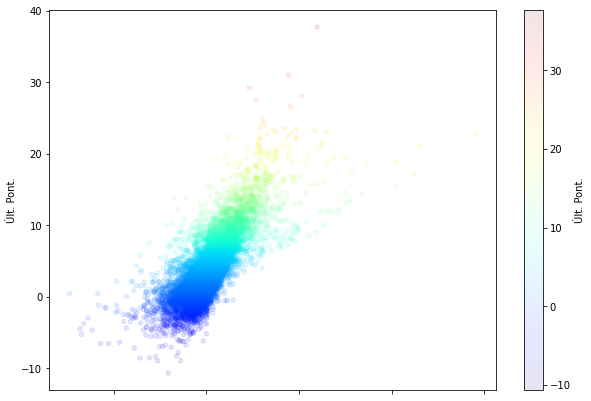

In [255]:
scouts.plot(kind="scatter", x="Variação", y="Últ. Pont.", alpha=0.1,figsize=(10,7), c="Últ. Pont.", cmap=plt.get_cmap("jet"), colorbar=True)

### Searching for correlations

In [256]:
corr_matrix = scouts.corr()

In [257]:
corr_matrix["Últ. Pont."].sort_values(ascending=False)

Últ. Pont.          1.000000
Variação            0.736462
Média               0.479507
Preço               0.363626
G                   0.157141
DP                  0.149756
FT                  0.120189
FD                  0.110644
A                   0.106988
FF                  0.106941
e_mandante          0.103193
DD                  0.100431
I                   0.091174
FS                  0.079453
J                   0.052013
SG                  0.049335
DS                  0.044129
RB                  0.040724
GS                  0.032720
GC                  0.031693
placar_mandante     0.027771
PI                  0.014039
CV                  0.012369
PE                  0.012350
rodada              0.010298
PP                  0.003684
FC                  0.001577
CA                 -0.011312
placar_visitante   -0.025624
ano                -0.057067
e_visitante        -0.103193
Name: Últ. Pont., dtype: float64

### trying new attr

In [258]:
scouts["A_por_jogo"]= scouts["A"] / scouts["J"]
scouts["SG_por_jogo"] = scouts["SG"] / scouts["J"]
scouts["DS_por_jogo"] = scouts["DS"] / scouts["J"]
scouts["DD_por_jogo"] = scouts["DD"] / scouts["J"]

In [259]:
corr_matrix = scouts.corr()
corr_matrix["Últ. Pont."].sort_values(ascending=False)

Últ. Pont.          1.000000
Variação            0.736462
Média               0.479507
Preço               0.363626
DD_por_jogo         0.329000
SG_por_jogo         0.204510
A_por_jogo          0.176706
G                   0.157141
DP                  0.149756
DS_por_jogo         0.124059
FT                  0.120189
FD                  0.110644
A                   0.106988
FF                  0.106941
e_mandante          0.103193
DD                  0.100431
I                   0.091174
FS                  0.079453
J                   0.052013
SG                  0.049335
DS                  0.044129
RB                  0.040724
GS                  0.032720
GC                  0.031693
placar_mandante     0.027771
PI                  0.014039
CV                  0.012369
PE                  0.012350
rodada              0.010298
PP                  0.003684
FC                  0.001577
CA                 -0.011312
placar_visitante   -0.025624
ano                -0.057067
e_visitante   

# Order data for AM algoritms

In [263]:
scouts = train_set.drop("Últ. Pont.", axis=1)
scouts_labels = train_set["Últ. Pont."].copy()

### cleaning the data

In [264]:
scouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13091 entries, 0 to 16403
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome              13091 non-null  object 
 1   Clube             13091 non-null  object 
 2   Preço             13091 non-null  float64
 3   J                 13091 non-null  float64
 4   Média             13091 non-null  float64
 5   Variação          13091 non-null  float64
 6   DS                3607 non-null   float64
 7   G                 4894 non-null   float64
 8   A                 4246 non-null   float64
 9   SG                4460 non-null   float64
 10  FS                10877 non-null  float64
 11  FF                8819 non-null   float64
 12  FD                7854 non-null   float64
 13  FT                2052 non-null   float64
 14  DD                1062 non-null   float64
 15  DP                306 non-null    float64
 16  GC                265 non-null    float6

In [265]:
#remember there are three option here.

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)

In [266]:
scouts_num = scouts.drop("Posicao", axis=1).drop("Nome", axis=1).drop("Clube", axis=1).drop("placar_mandante", axis=1).drop("placar_visitante", axis=1).drop("mandante", axis=1).drop("visitante", axis=1).drop("data", axis=1).drop("local", axis=1)
scouts_num.head()

,Preço,J,Média,Variação,DS,G,A,SG,FS,FF,...,GS,FC,I,PI,rodada,ano,RB,PE,e_mandante,e_visitante
0,14.21,1.0,15.60,10.21,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,4.0,1,2020,NaN,NaN,1,0
1,11.96,1.0,9.50,4.96,NaN,1.0,NaN,NaN,3.0,1.0,...,NaN,1.0,NaN,3.0,1,2020,NaN,NaN,1,0
2,7.46,1.0,5.30,2.46,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,10.0,1,2020,NaN,NaN,1,0
3,4.65,1.0,4.42,2.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,2020,NaN,NaN,1,0
4,8.19,1.0,4.30,1.19,4.0,NaN,NaN,NaN,3.0,NaN,...,NaN,1.0,NaN,7.0,1,2020,NaN,NaN,1,0


In [267]:
imputer.fit(scouts_num)

SimpleImputer(fill_value=0, strategy='constant')

In [268]:
imputer.statistics_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [269]:
X = imputer.transform(scouts_num)

In [270]:
scouts_tr = pd.DataFrame(X, columns=scouts_num.columns)

In [271]:
scouts_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13091 entries, 0 to 13090
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preço        13091 non-null  float64
 1   J            13091 non-null  float64
 2   Média        13091 non-null  float64
 3   Variação     13091 non-null  float64
 4   DS           13091 non-null  float64
 5   G            13091 non-null  float64
 6   A            13091 non-null  float64
 7   SG           13091 non-null  float64
 8   FS           13091 non-null  float64
 9   FF           13091 non-null  float64
 10  FD           13091 non-null  float64
 11  FT           13091 non-null  float64
 12  DD           13091 non-null  float64
 13  DP           13091 non-null  float64
 14  GC           13091 non-null  float64
 15  CV           13091 non-null  float64
 16  CA           13091 non-null  float64
 17  PP           13091 non-null  float64
 18  GS           13091 non-null  float64
 19  FC  